✅ Acurácia no teste: 0.98
🔍 Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



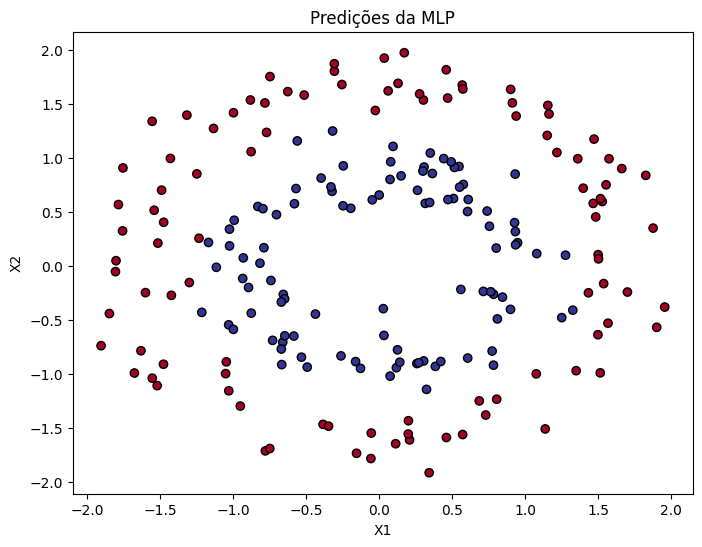

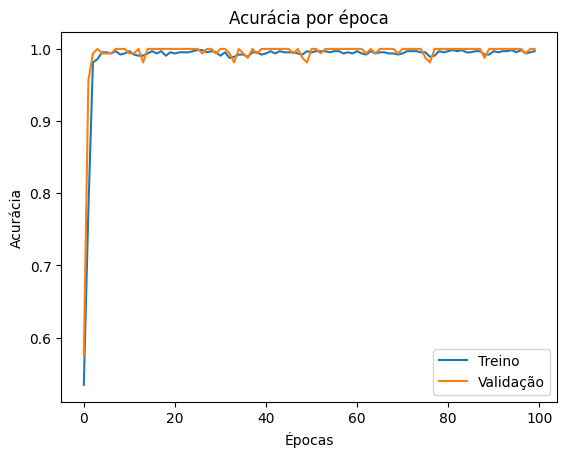

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
import tensorflow as tf

# 🔧 Desativar avisos desnecessários do TensorFlow
tf.get_logger().setLevel('ERROR')

# 1. Gerar dados
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# 2. Pré-processamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Criar modelo com boas práticas
model = Sequential([
    Input(shape=(2,)),  # Entrada explícita, evita warnings
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída binária
])

# 5. Compilar modelo
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 6. Treinamento do modelo
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0  # Oculta logs de treino
)

# 7. Avaliação no conjunto de teste
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Acurácia no teste: {acc:.2f}")

# 8. Predições
preds = model.predict(X_test, verbose=0)
pred_labels = (preds > 0.5).astype(int)

# 9. Relatório de desempenho
print("🔍 Relatório de classificação:")
print(classification_report(y_test, pred_labels))

# 10. Visualização das predições
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_labels[:, 0], cmap='RdYlBu', edgecolors='k')
plt.title("Predições da MLP")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# 11. Curva de acurácia durante o treinamento
plt.figure()
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title("Acurácia por época")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

# 12. Salvar modelo no formato moderno (.keras)
model.save("mlp_model.keras")